In [1]:
%matplotlib inline
import pywt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

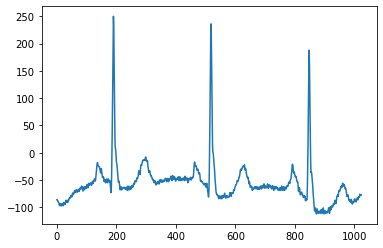

In [2]:
ecg = pywt.data.ecg()
plt.plot(ecg)

In [3]:
w = pywt.Wavelet('sym5')
max_level = pywt.dwt_max_level(len(ecg), 'sym5')
print(max_level)
coeff = pywt.wavedec(ecg, w, level=max_level)

6


/Users/MYK/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


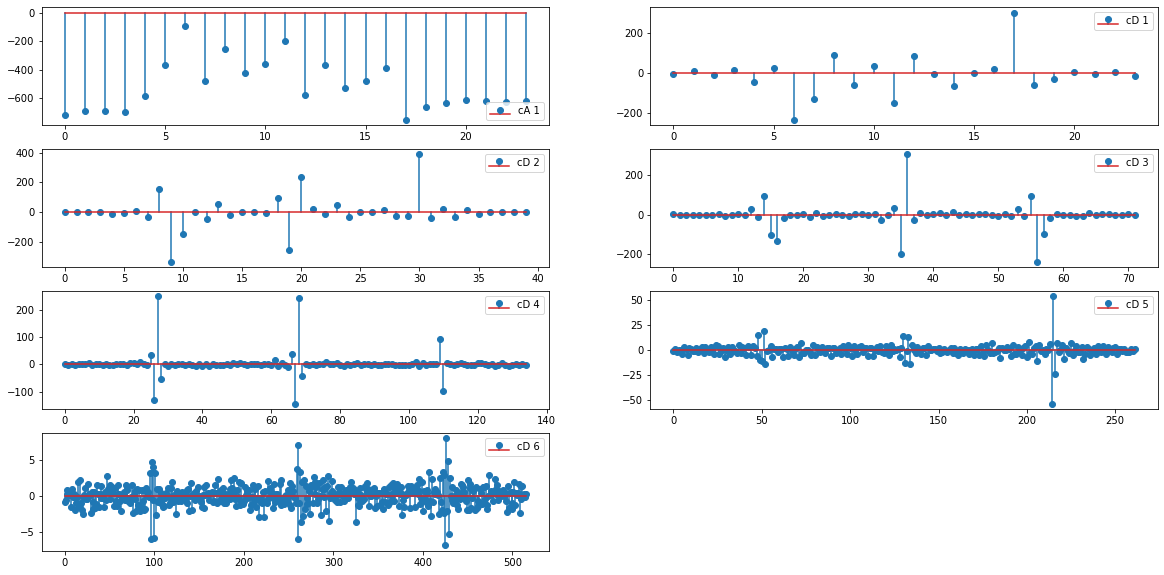

In [4]:
fig = plt.figure(figsize=(20,10))
for i in range(len(coeff)):
    ax = fig.add_subplot(4, 2, i+1)
    if i == 0:
        label = 'cA 1'
    else:
        label = 'cD {}'.format(i)
    ax.stem(coeff[i], label=label)
    plt.legend()

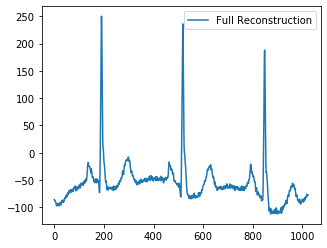

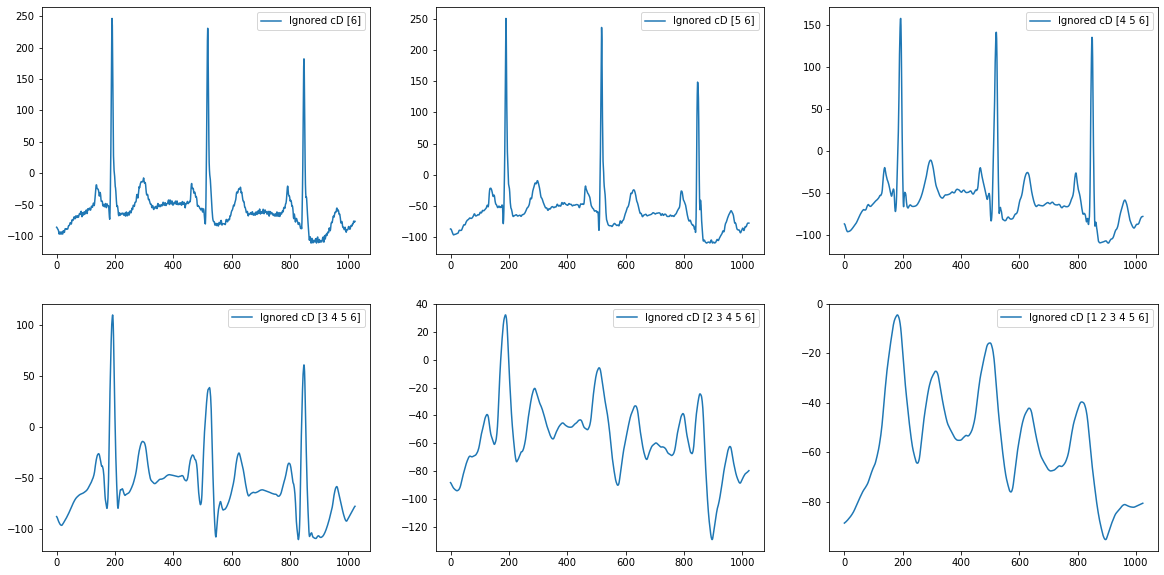

In [5]:
fig = plt.figure(figsize=(5,4))
plt.plot(pywt.waverec(coeff, w), label="Full Reconstruction")
plt.legend()
fig = plt.figure(figsize=(20,10))
for i in np.arange(len(coeff)-1)+1: #lencoeff - 1 = number of detail coefficients
    ax = fig.add_subplot(2, 3, i)
    masked_coeff = coeff[:-i]
    for j in np.arange(i):
        masked_coeff.append(np.zeros(len(coeff[-i:][j])))
    ignored_coeff = (np.arange(6)+1)[-i:]
    ax.plot(pywt.waverec(masked_coeff, w), label='Ignored cD {}'.format(ignored_coeff))
    plt.legend()

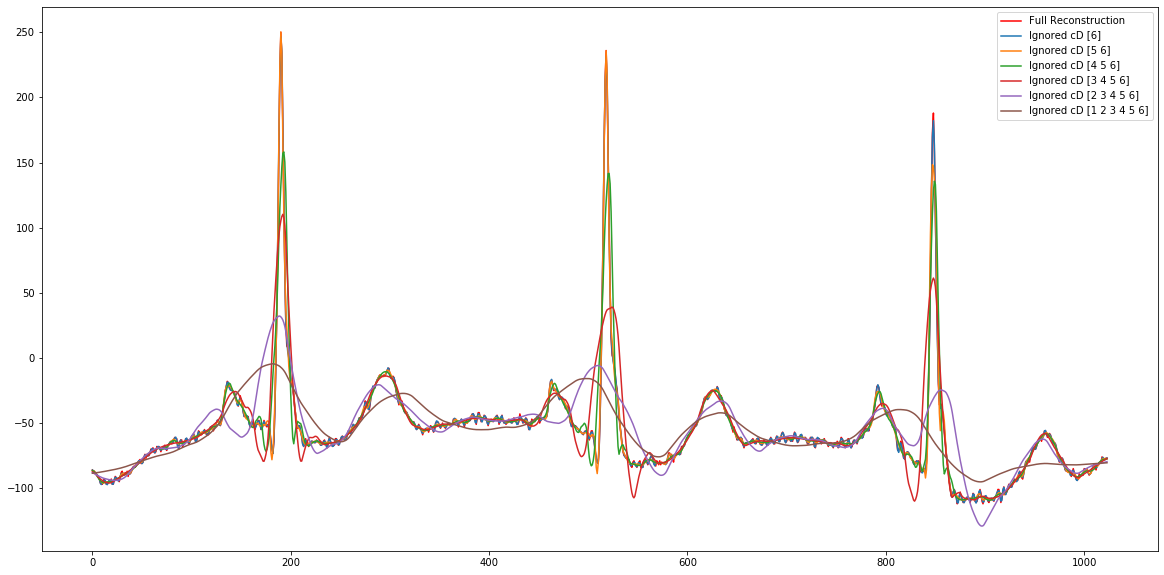

In [6]:
fig = plt.figure(figsize=(20,10))
plt.plot(pywt.waverec(coeff, w), 'r', label="Full Reconstruction")
for i in np.arange(len(coeff)-1)+1:
    masked_coeff = coeff[:-i]
    for j in np.arange(i):
        masked_coeff.append(np.zeros(len(coeff[-i:][j])))
    ignored_coeff = (np.arange(6)+1)[-i:]
    plt.plot(pywt.waverec(masked_coeff, w), label='Ignored cD {}'.format(ignored_coeff))
    plt.legend()

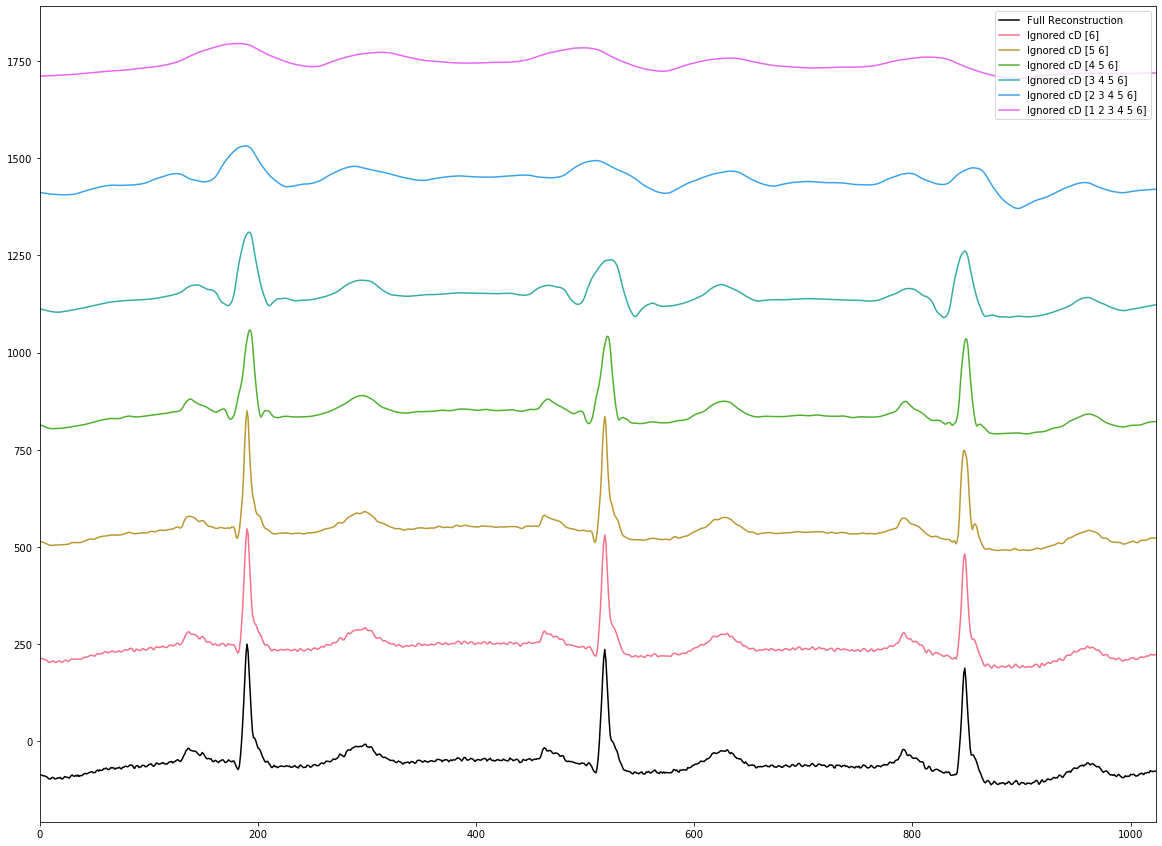

In [7]:
fig = plt.figure(figsize=(20,15))
plt.plot(pywt.waverec(coeff, w), 'k', label="Full Reconstruction")
for i in np.arange(len(coeff)-1)+1:
    masked_coeff = coeff[:-i]
    for j in np.arange(i):
        masked_coeff.append(np.zeros(len(coeff[-i:][j])))
    ignored_coeff = (np.arange(len(coeff)-1)+1)[-i:]
    
    df = pd.DataFrame(pywt.waverec(masked_coeff, w))
    colname = 'Ignored cD {}'.format(ignored_coeff)
    df.columns = [colname]
    df[colname] = df[colname] + (300*i) #joydivision plot
    
    cmap = sns.color_palette('husl', 6)
    df[colname].plot(color=cmap[i-1])
    plt.legend(loc=1)

# El Nino Data

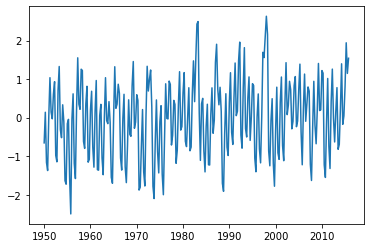

In [9]:
nino = np.vstack(pywt.data.nino())
plt.plot(nino[0], nino[1])

/Users/MYK/anaconda3/lib/python3.6/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 4 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


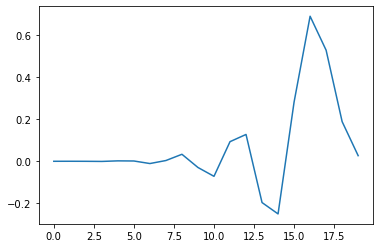

In [10]:
w = pywt.Wavelet('db10')
plt.plot(w.dec_lo)
coeff = pywt.wavedec(nino[1], w, mode='zero', level=4)

/Users/MYK/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


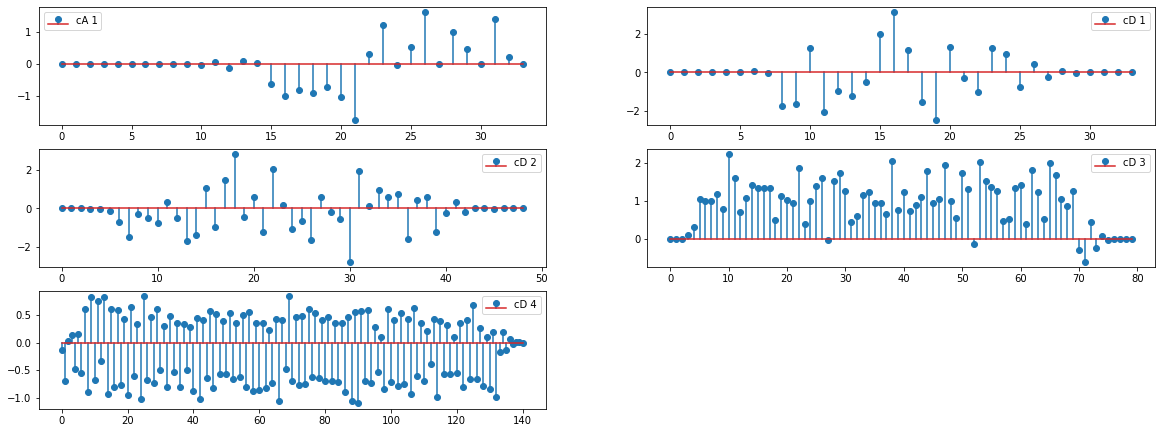

In [11]:
fig = plt.figure(figsize=(20,10))
for i in range(len(coeff)):
    ax = fig.add_subplot(4, 2, i+1)
    if i == 0:
        label = 'cA 1'
    else:
        label = 'cD {}'.format(i)
    ax.stem(coeff[i], label=label)
    plt.legend()

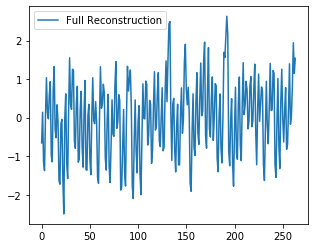

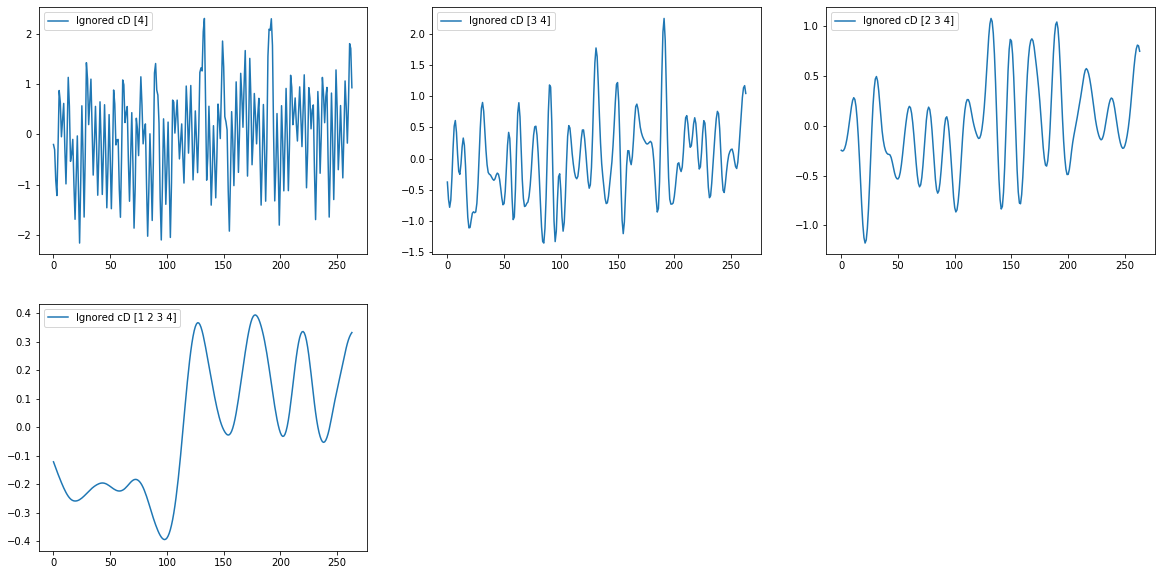

In [12]:
fig = plt.figure(figsize=(5,4))
plt.plot(pywt.waverec(coeff, w), label="Full Reconstruction")
plt.legend()
fig = plt.figure(figsize=(20,10))
for i in np.arange(len(coeff)-1)+1:
    ax = fig.add_subplot(2, 3, i)
    masked_coeff = coeff[:-i]
    for j in np.arange(i):
        masked_coeff.append(np.zeros(len(coeff[-i:][j])))
    ignored_coeff = (np.arange(len(coeff)-1)+1)[-i:]
    ax.plot(pywt.waverec(masked_coeff, w), label='Ignored cD {}'.format(ignored_coeff))
    plt.legend()

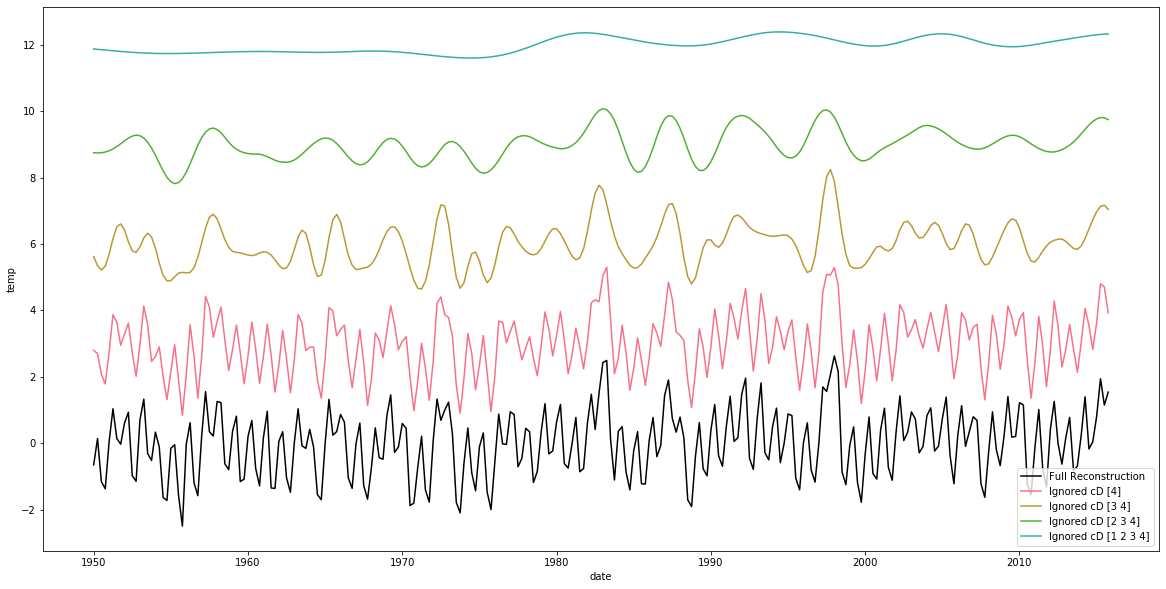

In [13]:
fig = plt.figure(figsize=(20,10))
plt.plot(nino[0], pywt.waverec(coeff, w), 'k', label="Full Reconstruction")
for i in np.arange(len(coeff)-1)+1:
    masked_coeff = coeff[:-i]
    for j in np.arange(i):
        masked_coeff.append(np.zeros(len(coeff[-i:][j])))
    ignored_coeff = (np.arange(len(coeff)-1)+1)[-i:]
    
    df = pd.DataFrame( [nino[0], pywt.waverec(masked_coeff, w)] ).T
    df.columns = ['date', 'temp']
    df['temp'] = df['temp'] + (3*i) #joydivision plot
    
    cmap = sns.color_palette('husl')
    sns.lineplot(x='date', y='temp', data=df, label='Ignored cD {}'.format(ignored_coeff), color=cmap[i-1])
    plt.legend()

# Continuous Wavelet Transform

In [8]:
x = np.linspace(0, 30,1000)
data = 8*np.sin(2*x)

In [9]:
coef, freqs = pywt.cwt(data, np.arange(1, 500),'morl', sampling_period=30/1000)

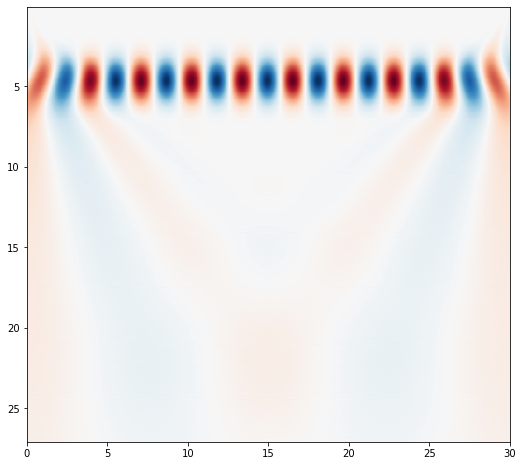

In [10]:
fig = plt.figure(figsize=(12,8))
extent = [0, 30, freqs[0], freqs[-1]] #left right bottom top
plt.imshow(coef, cmap="RdBu_r", extent=extent)

In [11]:
ts = np.hstack(np.loadtxt('/Users/MYK/Desktop/IRES/J0332_profs.txt'))

In [42]:
coeff, freq = pywt.cwt(ts, np.arange(1, 800), 'morl', sampling_period=.001)
#coeff is nscales x lengthofdata
pywt.scale2frequency('morl', freq)/.001

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

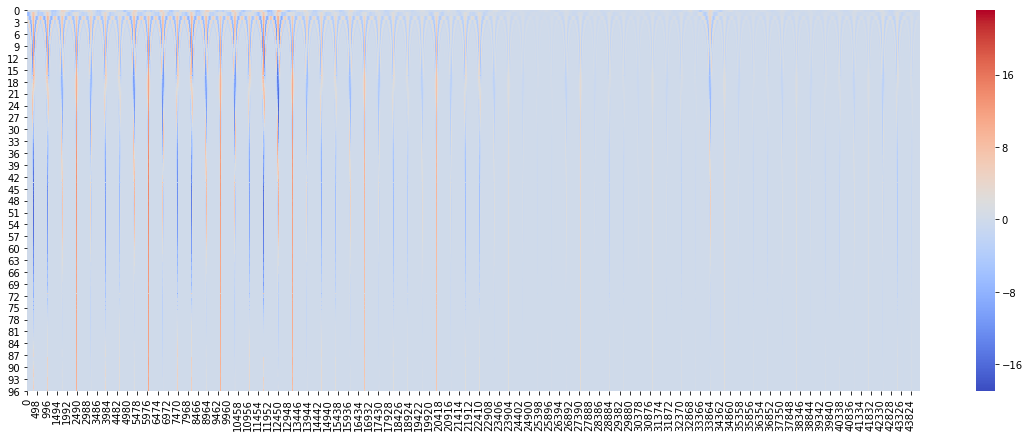

In [36]:
fig = plt.figure(figsize=(20,7))
sns.heatmap(coeff, cmap="coolwarm")

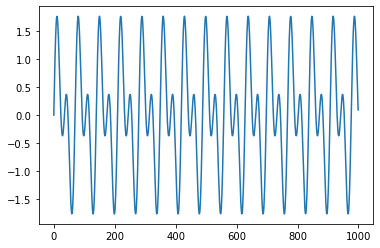

In [19]:
y = np.sin(3*x) + np.sin(6*x)
plt.plot(y)

In [20]:
coeff,freq = pywt.cwt(y, np.arange(1, 130), 'morl')

In [26]:
pywt.scale2frequency('morl', freq,)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129.])

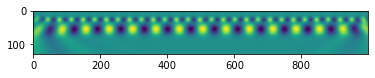

In [33]:
plt.imshow(coeff)